# HW1

**NAME :** X.O.mto<br>
**HW # :** 1<br>
**REPO:** *https://github.com/Somto-Dera/ECGR5090-Machine-Learning*<br>

**In this homework, we will use US Housing dataset. You will develop linear regression with gradient decent algorithm to estimate the price of the house. In this homework, we will use 70% and 30% split between training and evaluation (test) sets across all problems. (Note: You cannot use the built-in function from ML libraries for gradient descent, you must implement it yourself. However, you can use built-in function for normalization/standardization).**

####  PROBLEM 2:
#### A
- Repeat problem 1a, this time with input normalization and input standardization as part of your pre-processing logic.
- You need to perform two separate trainings for standardization and normalization.
- Plot the training and validation losses for both training and validation set based on input standardization and input normalization.
- Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1a.
- Which input scaling achieves the best training? Explain your results.

#### B
- Repeat problem 1b, this time with input normalization and input standardization as part of your pre-processing logic.
- You need to perform two separate trainings for standardization and normalization.
- Plot the training and validation losses for both training and validation set based on input standardization and input normalization.
- Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1b.
- Which input scaling achieves the best training? Explain your results.

**STEPS:**
<br>
* Import Needed libraries

* Function Definition
    * Define cost function
    * Define gradient function
    * Define standardization function
    * Define normalization function

* Data Preparation
    * Load and understand data
    * Perform minor EDA

* Problem 2.A: Linear Regression Model(NormStandard)
    * Split the data into X and y
    * Split the data into training and test data set
    * Scale train and test set
    * Build the linear regression model
    * Evaluate the model
    * Plot a convergence of gradient descent graph with cost history
    * Plot a graph showing the effect of changing the learning rate in convergence of the gradient descent with cost history
    * Test linear regression model test dataset
    * Evaluate results        
        
* Problem 2.B: Linear Regression Model(NormStandard)
    * Use one hot encoding to convert non number data to binary
    * Split the data into X and y
    * Split the data into training and test data set
    * Scale train and test set
    * Build the linear regression model
    * Evaluate the model
    * Plot a convergence of gradient descent graph with cost history
    * Plot a graph showing the effect of changing the learning rate in convergence of the gradient descent with cost history
    * Test linear regression model test dataset
    * Evaluate results

________________________________________________________________________________________________________________

________________________________________________________________________________________________________________

In [1]:
# import the needed libraries
import numpy as np          # for array and matrics manipulation
import pandas as pd          # for data manipulation and analysis
import matplotlib.pyplot as plt          # for data visualisation
from sklearn.model_selection import train_test_split          # to split data sets
from sklearn.compose import ColumnTransformer          # to apply transformers to columns of an array or pandas DataFrame
from sklearn.preprocessing import OneHotEncoder          # for onehot encoding

________________________________________________________________________________________________________________

**Details on *feature_normalize* function**.<br>
- normalizes the features(input variables) in X.

**Input Parameters**<br>
* X : n dimensional array (matrix), shape (n_samples, n_features). Features(input varibale) to be normalized.

**Returns**<br>
* X_norm : n dimensional array (matrix), shape (n_samples,n_features). A normalized version of X.

In [2]:
def feature_normalize(X):
    
    X_norm = (X - np.min(X))/(np.max(X) - np.min(X))
    return X_norm

**Details on *feature_standardize* function**.<br>
- standardizes the features(input variables) in X.

**Input Parameters**<br>
* X : n dimensional array (matrix), shape (n_samples, n_features). Features(input varibale) to be standardized.

**Returns**<br>
* X_norm : n dimensional array (matrix), shape (n_samples,n_features). A normalized version of X.
* mu : n dimensional array (matrix), shape (n_features,). The mean value.
* sigma : n dimensional array (matrix), shape (n_features,). The standard deviation.

In [3]:
def feature_standardize(X):
    
    #Note here we need mean of indivdual column here, hence axis = 0
    mu = np.mean(X, axis = 0)
    # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
    sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma

**Details on *comp_cost* function for the linear regression**.<br>

- the hypotheis function is h(θ,x)= θ_0 + θ_1 * x_1 + ... + θ_n * x_n

<br>**Input Parameters**
- *'X' :* 2D array where each row represent the training example and each column represent the feature ndarray
- *'y' :* 1D array of labels/target value for each traing example. dimension(1 x m)
- *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)

<br>**Dimension(m x n)**
- *'m' :* number of training examples
- *'n' :* number of features (including X_0 column of ones)

<br>**Output Parameters**
- *'J' :* scalar value

<br>**Library Functions Used**
- *numpy.dot()* returns the product of two arrays
- *numpy.subtract()* performs vector entree subtraction
- *numpy.square()* performs the vector entree square

In [4]:
def comp_cost(X, y, theta, flag):
    
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    
    if flag == "simple regr":
        J = 1 / (2 * m) * np.sum(sqrErrors)
        
    if flag == "onehot regr":
        J = 1 / (2 * m) * errors.T.dot(errors)
    
    return J

**Details on *gradient_descent* function**
- a for loop i used to compute theta using batch gradient descent algorithm
- each value theta value is used to compute cost.Result is stored in a list
- cost should decrease with every iteration
- returns new theta and cost history variable

<br>**Input Parameters**
- *'X' :* 2D array where each row represent the training example and each column represent the feature ndarray
- *'y' :* 1D array of labels/target value for each traing example. dimension(1 x m)
- *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)
- *'alpha' :* Learning rate. Scalar value
- *'iterations':* No of iterations. Scalar value. 

<br>**Dimension(m x n)**
- *'m' :* number of training examples
- *'n' :* number of features (including X_0 column of ones)

<br>**Output Parameters**
- *'theta' :*  Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
- *'cost_history' :* Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)

<br>**Library Functions Used**
- *numpy.dot()* returns the product of two arrays
- *numpy.subtract()* performs vector entree subtraction
- *numpy.transpose()* reverse or permute the axes of an array

In [5]:
def gradient_descent(X, y, theta, alpha, iterations, flag):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        
        cost_history[i] = comp_cost(X, y, theta, flag)
        
    return theta, cost_history

________________________________________________________________________________________________________________

________________________________________________________________________________________________________________

In [6]:
# load dataset
housing = pd.read_csv('Housing.csv')          # load dataset
housing.head()          # output first 5 rows from the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


* It contains 13 columns, the 11 columns are explanatory variables x1, ..., x10; and the final/fourth column is the dependent variable y. It has 545 data-value per datapoint(column).

In [7]:
dataset = housing
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
dataset.shape

(545, 13)

In [9]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
# drop columns not used for the training
dataset = dataset.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], axis='columns')
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [12]:
# split dataset into test(0.3) and train(0.7)
np.random.seed(0)
dataset_train, dataset_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 1)
dataset_train.shape

(381, 6)

In [13]:
dataset_test.shape

(164, 6)

In [14]:
x_train = dataset_train.values[:, 1:6]          # get input values from 2nd to 6th column
y_train = dataset_train.values[:, 0]          # get output values from first column
m = len(y_train)          # number of training examples
temp_m = len(x_train)
assert (m == temp_m)

Text(0.5, 1.0, 'SCATTER PLOT OF TRAINING DATA')

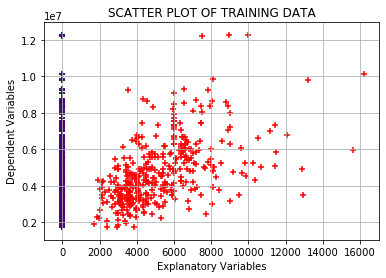

In [15]:
# plot a scatter graph of dataset
plt.scatter(dataset_train.values[:, 1],y_train, color='red',marker= '+')
plt.scatter(dataset_train.values[:, 2],y_train, color='yellow',marker= '+')
plt.scatter(dataset_train.values[:, 3],y_train, color='blue',marker= '+')
plt.scatter(dataset_train.values[:, 4],y_train, color='green',marker= '+')
plt.scatter(dataset_train.values[:, 5],y_train, color='indigo',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Explanatory Variables')
plt.ylabel('Dependent Variables')
plt.title('SCATTER PLOT OF TRAINING DATA')

In [16]:
# perform normalization of input(independent) vars
x_train_norm = feature_normalize(x_train)
print('X_norm= ', x_train_norm[:5])

# perform standardization of input(independent) vars
x_train_standard, mu, sigma = feature_standardize(x_train)
print('X_stand= ', x_train_standard[:5])

X_norm=  [[2.77777778e-01 2.46913580e-04 1.23456790e-04 6.17283951e-05
  1.23456790e-04]
 [2.18518519e-01 1.23456790e-04 6.17283951e-05 6.17283951e-05
  0.00000000e+00]
 [4.44444444e-01 1.85185185e-04 1.23456790e-04 6.17283951e-05
  1.85185185e-04]
 [1.92592593e-01 1.85185185e-04 6.17283951e-05 1.23456790e-04
  0.00000000e+00]
 [2.46913580e-01 1.85185185e-04 1.23456790e-04 1.23456790e-04
  6.17283951e-05]]
X_stand=  [[-0.32640558  1.32167636  1.39689225 -0.92698554  1.51846971]
 [-0.75373534 -1.30102517 -0.5816057  -0.92698554 -0.79567813]
 [ 0.87545936  0.0103256   1.39689225 -0.92698554  2.67554362]
 [-0.94069211  0.0103256  -0.5816057   0.25422346 -0.79567813]
 [-0.54897316  0.0103256   1.39689225  0.25422346  0.36139579]]


In [17]:
# hstack() function from numpy is used  to add column of ones to X feature 
# this is the final X matrix (feature matrix)
x_train_norm = np.hstack((np.ones((m,1)), x_train_norm))
x_train_standard = np.hstack((np.ones((m,1)), x_train_standard))

#Initialise theta to zero as recommended by the hw question
init_theta = np.zeros(6)

# declare and assign values to the gradient descent learning parameters alpha and no of iterations
iterations = 1000          # number of iterations
#alpha = 0.0000000004
#iterations = 800

________________________________________________________________________________________________________________

> **Feature Normalisation**

> **Call *gradient_descent* function**
- *penalised_gradient_descent* function returns optimal theta and cost history.
- values are printed to screen

In [18]:
flag = 'simple regr'
optimal_alpha = 0.03
optimal_theta_norm, cost_history_norm = gradient_descent(x_train_norm, y_train, init_theta, optimal_alpha, iterations, flag)

print('Final value of train theta: ', optimal_theta_norm)
print('First 5 values from cost_history: ', cost_history_norm[: 5])
print('Last 5 values from cost_history: ', cost_history_norm[-5:])

Final value of train theta:  [3.62411758e+06 3.61992786e+06 1.49024443e+03 1.12477398e+03
 1.51799842e+03 1.08767850e+03]
First 5 values from cost_history:  [1.22673889e+13 1.15613081e+13 1.09012949e+13 1.02843424e+13
 9.70763996e+12]
Last 5 values from cost_history:  [1.27344304e+12 1.27333959e+12 1.27323625e+12 1.27313301e+12
 1.27302988e+12]


> **Plot the *convergence of gradient descent for cost history* .**
- cost_history contains the values of cost for every iteration performed during batch gradient descent
- values of cost against no of iterations to visualize the performance of the 'Gradient Descent Algorithm' is plotted

Text(0.5, 1.0, 'Convergence of gradient descent for train model (alpha = 0.03)')

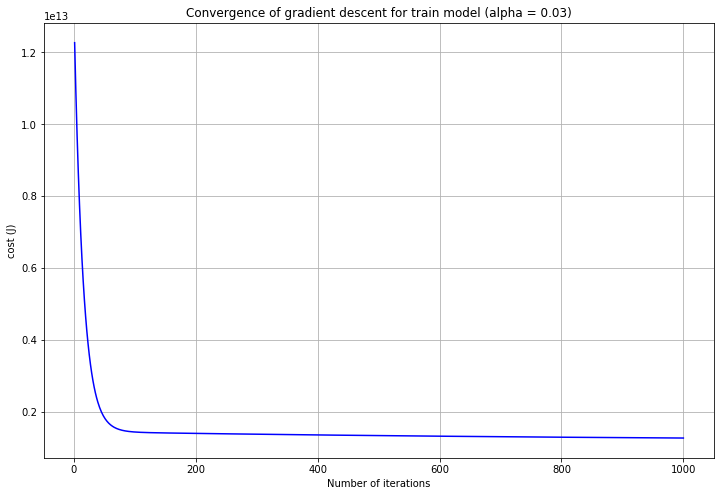

In [19]:
plt.plot(range(1, iterations +1), cost_history_norm, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent for train model (alpha = 0.03)")

> **Test model**

In [20]:
x_test = dataset_test.values[:, 1:6]          # get input values from 2nd to 6th column
y_test = dataset_test.values[:, 0]          # get output values from first column
m = len(y_test)          # Number of training examples
temp_m = len(x_test)
assert (m == temp_m)

In [21]:
x_test_norm = feature_normalize(x_test)
print('X_test_norm= ', x_test_norm[:5])

X_test_norm=  [[4.72727273e-01 3.03030303e-04 1.51515152e-04 1.51515152e-04
  7.57575758e-05]
 [6.36363636e-01 3.03030303e-04 7.57575758e-05 3.03030303e-04
  2.27272727e-04]
 [7.95454545e-01 3.03030303e-04 1.51515152e-04 1.51515152e-04
  7.57575758e-05]
 [4.86363636e-01 2.27272727e-04 7.57575758e-05 2.27272727e-04
  0.00000000e+00]
 [5.01136364e-01 2.27272727e-04 7.57575758e-05 1.51515152e-04
  0.00000000e+00]]


In [22]:
x_test_norm = np.hstack((np.ones((m,1)), x_test_norm))
prediction = np.array(x_test_norm).dot(optimal_theta_norm)
#prediction = x_test.dot(optimal_theta)

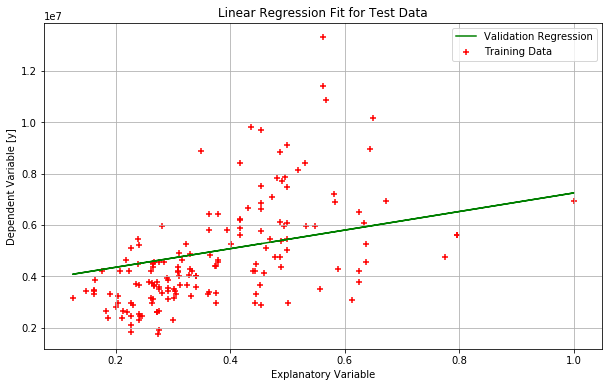

In [23]:
# plot test data 
plt.scatter(x_test_norm[:,1], y_test, color='red', marker= '+', label= 'Training Data')
plt.plot(x_test_norm[:,1],prediction, color='green', label='Validation Regression')
plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.xlabel('Explanatory Variable')
plt.ylabel('Dependent Variable [y]')
plt.title('Linear Regression Fit for Test Data')
plt.legend()

> **Feature Standardization**

> **Call *gradient_descent* function**
- *penalised_gradient_descent* function returns optimal theta and cost history.
- values are printed to screen

In [24]:
flag = 'simple regr'
optimal_alpha = 0.03
optimal_theta_standard, cost_history_standard = gradient_descent(x_train_standard, y_train, init_theta, optimal_alpha, iterations, flag)

print('Final value of train theta: ', optimal_theta_standard)
print('First 5 values from cost_history: ', cost_history_standard[: 5])
print('Last 5 values from cost_history: ', cost_history_standard[-5:])

Final value of train theta:  [4775201.94225721  703518.35649121   53022.08260659  594731.7381146
  471093.35465657  333995.16619778]
First 5 values from cost_history:  [2.62017392e+13 2.27458585e+13 1.97933383e+13 1.72668082e+13
 1.51017139e+13]
Last 5 values from cost_history:  [1.62487864e+12 1.62487864e+12 1.62487864e+12 1.62487864e+12
 1.62487864e+12]


> **Plot the *convergence of gradient descent for cost history* .**
- cost_history contains the values of cost for every iteration performed during batch gradient descent
- values of cost against no of iterations to visualize the performance of the 'Gradient Descent Algorithm' is plotted

Text(0.5, 1.0, 'Convergence of gradient descent for train model (alpha = 0.03)')

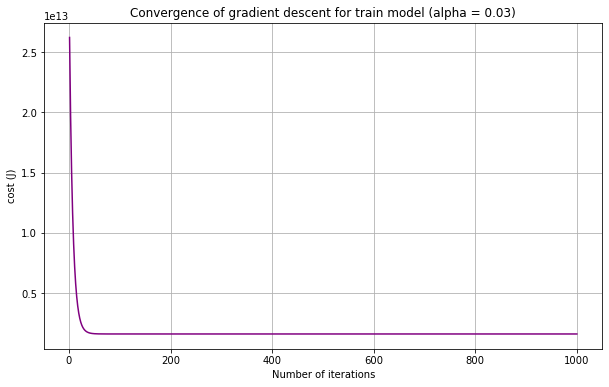

In [25]:
plt.plot(range(1, iterations +1), cost_history_standard, color ='purple')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent for train model (alpha = 0.03)")

> **Test model**

In [26]:
x_test = dataset_test.values[:, 1:6]          # get input values from 2nd to 6th column
y_test = dataset_test.values[:, 0]          # get output values from first column
m = len(y_test)          # Number of training examples
temp_m = len(x_test)
assert (m == temp_m)

In [27]:
x_test_standard, mu, sigma = feature_standardize(x_test)
print('X_stand= ', x_test_standard[:5])

X_stand=  [[ 0.64908286  1.62413499  1.47348095  0.15992423  0.34118416]
 [ 1.74299277  1.62413499 -0.54027635  2.34555539  2.67260924]
 [ 2.80651629  1.62413499  1.47348095  0.15992423  0.34118416]
 [ 0.74024202  0.14436755 -0.54027635  1.25273981 -0.82452838]
 [ 0.83899777  0.14436755 -0.54027635  0.15992423 -0.82452838]]


In [28]:
x_test_standard = np.hstack((np.ones((m,1)), x_test_standard))
prediction = np.array(x_test_standard).dot(optimal_theta_standard)
#prediction = x_test.dot(optimal_theta_standard)

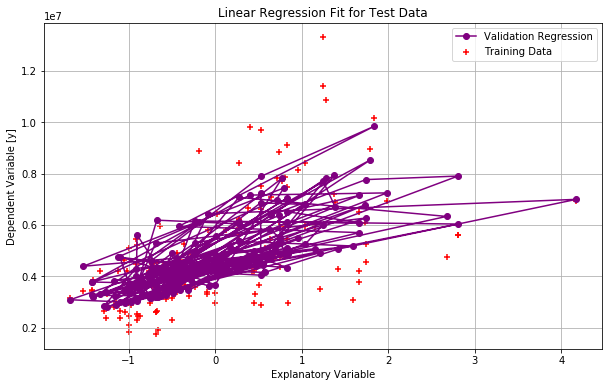

In [29]:
# plot test data 
plt.scatter(x_test_standard[:,1], y_test, color='red', marker= '+', label= 'Training Data')
#plt.plot(x_test[:,1], y_test, color='blue', marker= '+', label= 'Training Data')
plt.plot(x_test_standard[:,1],prediction, color='purple', marker= 'o', label='Validation Regression')
plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.xlabel('Explanatory Variable')
plt.ylabel('Dependent Variable [y]')
plt.title('Linear Regression Fit for Test Data')
plt.legend()

----------------------------------------------------------------------------------------------------------------

### Problem 2-B

In [30]:
dataset = housing
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [31]:
dataset.basement.unique()

array(['no', 'yes'], dtype=object)

In [32]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in categorical_columns:
    tempdataset = pd.get_dummies(dataset[column], prefix=column)
    dataset = pd.merge(
        left=dataset,
        right=tempdataset,
        left_index=True,
        right_index=True,
    )
    dataset = dataset.drop(columns=column)
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,furnished,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,semi-furnished,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,furnished,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,furnished,0,1,0,1,0,1,1,0,0,1,1,0


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                545 non-null    int64 
 1   area                 545 non-null    int64 
 2   bedrooms             545 non-null    int64 
 3   bathrooms            545 non-null    int64 
 4   stories              545 non-null    int64 
 5   parking              545 non-null    int64 
 6   furnishingstatus     545 non-null    object
 7   mainroad_no          545 non-null    uint8 
 8   mainroad_yes         545 non-null    uint8 
 9   guestroom_no         545 non-null    uint8 
 10  guestroom_yes        545 non-null    uint8 
 11  basement_no          545 non-null    uint8 
 12  basement_yes         545 non-null    uint8 
 13  hotwaterheating_no   545 non-null    uint8 
 14  hotwaterheating_yes  545 non-null    uint8 
 15  airconditioning_no   545 non-null    uint8 
 16  aircondi

In [34]:
dataset = dataset.drop(['furnishingstatus'], axis='columns')
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0


In [35]:
np.random.seed(0)
dataset_train, dataset_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 1)
dataset_train.shape

(381, 18)

In [36]:
x_train = dataset_train.values[:, 1:18]          # get input values from first column
y_train = dataset_train.values[:, 0]          # get output values from second column
m = len(y_train)          # Number of training examples
temp_m = len(x_train)
assert (m == temp_m)

Text(0.5, 1.0, 'SCATTER PLOT OF TRAINING DATA')

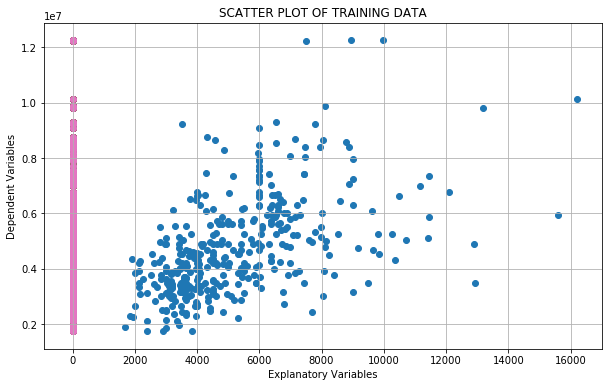

In [37]:
#plt.scatter(dataset_train.values[:, 1],y_train, color='red',marker= '+')
#plt.scatter(dataset_train.values[:, 2],y_train, color='yellow',marker= '+')
#plt.scatter(dataset_train.values[:, 3],y_train, color='blue',marker= '+')
#plt.scatter(dataset_train.values[:, 4],y_train, color='green',marker= '+')
#plt.scatter(dataset_train.values[:, 5],y_train, color='indigo',marker= '+')

for var in range(1,18):
    plt.scatter(dataset_train.values[:, var],y_train)
    plt.rcParams['figure.figsize'] = (12,8)
    
plt.grid()
plt.xlabel('Explanatory Variables')
plt.ylabel('Dependent Variables')
plt.title('SCATTER PLOT OF TRAINING DATA')

In [38]:
# perform normalization of input(independent) vars
x_train_norm = feature_normalize(x_train)
print('X_norm= ', x_train_norm[:5])

# perform standardization of input(independent) vars
x_train_standard, mu, sigma = feature_standardize(x_train)
print('X_stand= ', x_train_standard[:5])

X_norm=  [[2.77777778e-01 2.46913580e-04 1.23456790e-04 6.17283951e-05
  1.23456790e-04 6.17283951e-05 0.00000000e+00 6.17283951e-05
  0.00000000e+00 0.00000000e+00 6.17283951e-05 6.17283951e-05
  0.00000000e+00 0.00000000e+00 6.17283951e-05 6.17283951e-05
  0.00000000e+00]
 [2.18518519e-01 1.23456790e-04 6.17283951e-05 6.17283951e-05
  0.00000000e+00 6.17283951e-05 0.00000000e+00 0.00000000e+00
  6.17283951e-05 0.00000000e+00 6.17283951e-05 6.17283951e-05
  0.00000000e+00 6.17283951e-05 0.00000000e+00 6.17283951e-05
  0.00000000e+00]
 [4.44444444e-01 1.85185185e-04 1.23456790e-04 6.17283951e-05
  1.85185185e-04 0.00000000e+00 6.17283951e-05 6.17283951e-05
  0.00000000e+00 0.00000000e+00 6.17283951e-05 6.17283951e-05
  0.00000000e+00 0.00000000e+00 6.17283951e-05 6.17283951e-05
  0.00000000e+00]
 [1.92592593e-01 1.85185185e-04 6.17283951e-05 1.23456790e-04
  0.00000000e+00 6.17283951e-05 0.00000000e+00 6.17283951e-05
  0.00000000e+00 6.17283951e-05 0.00000000e+00 6.17283951e-05
  0.000

In [39]:
# hstack() function from numpy is used  to add column of ones to X feature 
# this is the final X matrix (feature matrix)
x_train_norm = np.hstack((np.ones((m,1)), x_train_norm))
x_train_standard = np.hstack((np.ones((m,1)), x_train_standard))

#Initialise theta to zero as recommended by the hw question
init_theta = np.zeros(18)

# declare and assign values to the gradient descent learning parameters alpha and no of iterations
iterations = 1000          # number of iterations
#alpha = 0.0000000004
#iterations = 800

> **Feature Normalisation**

> **Call *gradient_descent* function**
- *gradient_descent* function returns optimal theta and cost history.
- values are printed to screen

In [40]:
flag = 'simple regr'
optimal_alpha = 0.03
init_theta = np.zeros(18)
optimal_theta_norm, cost_history_norm = gradient_descent(x_train_norm, y_train, init_theta, optimal_alpha, iterations, flag)

print('Final value of train theta: ', optimal_theta_norm)
print('First 5 values from cost_history: ', cost_history_norm[: 5])
print('Last 5 values from cost_history: ', cost_history_norm[-5:])

Final value of train theta:  [ 3.62411756e+06  3.61992783e+06  1.49024442e+03  1.12477398e+03
  1.51799842e+03  1.08767849e+03 -2.70369595e+02  4.94080556e+02
 -9.42312725e+01  3.17942233e+02 -2.19081943e+02  4.42792903e+02
  1.42179241e+02  8.15317192e+01 -3.73285707e+02  5.96996667e+02
 -2.04870154e+02  4.28581115e+02]
First 5 values from cost_history:  [1.22673889e+13 1.15613081e+13 1.09012949e+13 1.02843423e+13
 9.70763992e+12]
Last 5 values from cost_history:  [1.27344300e+12 1.27333955e+12 1.27323621e+12 1.27313297e+12
 1.27302984e+12]


> **Plot the *convergence of gradient descent for cost history* .**
- cost_history contains the values of cost for every iteration performed during batch gradient descent
- values of cost against no of iterations to visualize the performance of the 'Gradient Descent Algorithm' is plotted

Text(0.5, 1.0, 'Convergence of gradient descent for train model (alpha = 0.03)')

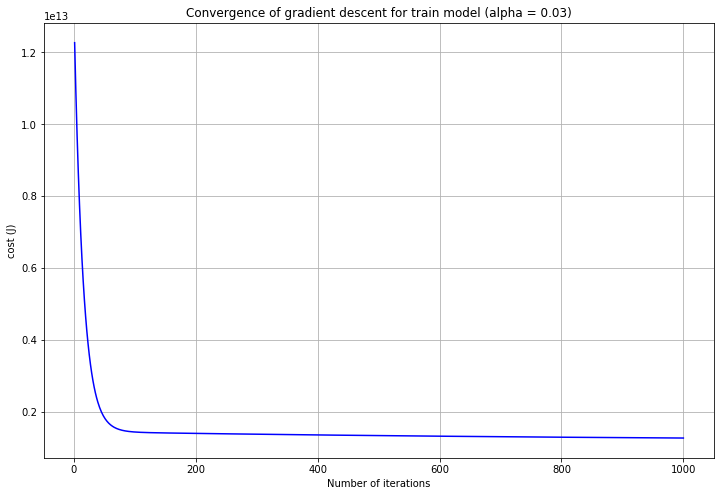

In [41]:
plt.plot(range(1, iterations +1), cost_history_norm, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent for train model (alpha = 0.03)")

> **Test model**

In [42]:
x_test = dataset_test.values[:, 1:18]          # get input values from 2nd to 6th column
y_test = dataset_test.values[:, 0]          # get output values from first column
m = len(y_test)          # Number of training examples
temp_m = len(x_test)
assert (m == temp_m)

In [43]:
x_test_norm = feature_normalize(x_test)
print('X_test_norm= ', x_test_norm[:5])

X_test_norm=  [[4.72727273e-01 3.03030303e-04 1.51515152e-04 1.51515152e-04
  7.57575758e-05 0.00000000e+00 7.57575758e-05 7.57575758e-05
  0.00000000e+00 7.57575758e-05 0.00000000e+00 7.57575758e-05
  0.00000000e+00 0.00000000e+00 7.57575758e-05 7.57575758e-05
  0.00000000e+00]
 [6.36363636e-01 3.03030303e-04 7.57575758e-05 3.03030303e-04
  2.27272727e-04 0.00000000e+00 7.57575758e-05 7.57575758e-05
  0.00000000e+00 7.57575758e-05 0.00000000e+00 7.57575758e-05
  0.00000000e+00 7.57575758e-05 0.00000000e+00 7.57575758e-05
  0.00000000e+00]
 [7.95454545e-01 3.03030303e-04 1.51515152e-04 1.51515152e-04
  7.57575758e-05 0.00000000e+00 7.57575758e-05 7.57575758e-05
  0.00000000e+00 7.57575758e-05 0.00000000e+00 7.57575758e-05
  0.00000000e+00 7.57575758e-05 0.00000000e+00 7.57575758e-05
  0.00000000e+00]
 [4.86363636e-01 2.27272727e-04 7.57575758e-05 2.27272727e-04
  0.00000000e+00 0.00000000e+00 7.57575758e-05 7.57575758e-05
  0.00000000e+00 0.00000000e+00 7.57575758e-05 7.57575758e-05
  

In [44]:
x_test_norm = np.hstack((np.ones((m,1)), x_test_norm))
prediction = np.array(x_test_norm).dot(optimal_theta_norm)
#prediction = x_test.dot(optimal_theta)

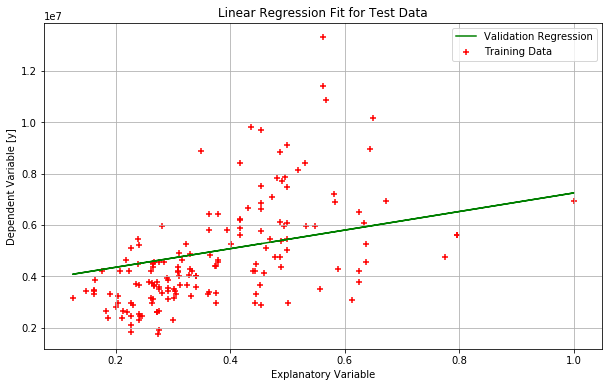

In [45]:
# plot test data 
plt.scatter(x_test_norm[:,1], y_test, color='red', marker= '+', label= 'Training Data')
#plt.plot(x_test[:,1], y_test, color='blue', marker= '+', label= 'Training Data')
plt.plot(x_test_norm[:,1],prediction, color='green', label='Validation Regression')
plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.xlabel('Explanatory Variable')
plt.ylabel('Dependent Variable [y]')
plt.title('Linear Regression Fit for Test Data')
plt.legend()

----------------------------------------------------------------------------------------------------------------

> **Feature Standardization**

> **Call *gradient_descent* function**
- *gradient_descent* function returns optimal theta and cost history.
- values are printed to screen

In [46]:
flag = 'simple regr'
optimal_alpha = 0.03
optimal_theta_standard, cost_history_standard = gradient_descent(x_train_standard, y_train, init_theta, optimal_alpha, iterations, flag)

print('Final value of train theta: ', optimal_theta_standard)
print('First 5 values from cost_history: ', cost_history_standard[: 5])
print('Last 5 values from cost_history: ', cost_history_standard[-5:])

Final value of train theta:  [4775201.94225721  563150.78371992   33261.30624403  529357.44371379
  443939.60211415  257906.39644756  -89231.39501346   89231.39501346
  -55317.80293467   55317.80293467 -139681.51209025  139681.51209025
  -90105.42199757   90105.42199758 -142227.43802649  142227.43802649
 -111022.9674188   111022.9674188 ]
First 5 values from cost_history:  [2.57863129e+13 2.21522247e+13 1.91424372e+13 1.66169591e+13
 1.44781819e+13]
Last 5 values from cost_history:  [1.2304103e+12 1.2304103e+12 1.2304103e+12 1.2304103e+12 1.2304103e+12]


> **Plot the *convergence of gradient descent for cost history* .**
- cost_history contains the values of cost for every iteration performed during batch gradient descent
- values of cost against no of iterations to visualize the performance of the 'Gradient Descent Algorithm' is plotted

Text(0.5, 1.0, 'Convergence of gradient descent for train model (alpha = 0.03)')

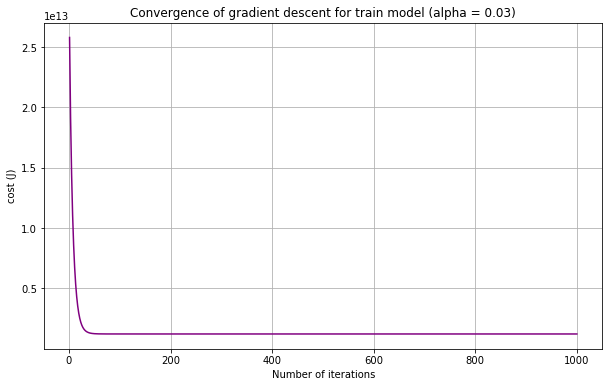

In [47]:
plt.plot(range(1, iterations +1), cost_history_standard, color ='purple')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent for train model (alpha = 0.03)")

> **Test model**

In [48]:
x_test = dataset_test.values[:, 1:18]          # get input values from 2nd to 6th column
y_test = dataset_test.values[:, 0]          # get output values from first column
m = len(y_test)          # Number of training examples
temp_m = len(x_test)
assert (m == temp_m)

In [49]:
x_test_standard, mu, sigma = feature_standardize(x_test)
print('X_stand= ', x_test_standard[:5])

X_stand=  [[ 0.64908286  1.62413499  1.47348095  0.15992423  0.34118416 -0.39240908
   0.39240908  0.49086255 -0.49086255  0.70817399 -0.70817399  0.2105092
  -0.2105092  -1.32996595  1.32996595  0.50984676 -0.50984676]
 [ 1.74299277  1.62413499 -0.54027635  2.34555539  2.67260924 -0.39240908
   0.39240908  0.49086255 -0.49086255  0.70817399 -0.70817399  0.2105092
  -0.2105092   0.7473142  -0.7473142   0.50984676 -0.50984676]
 [ 2.80651629  1.62413499  1.47348095  0.15992423  0.34118416 -0.39240908
   0.39240908  0.49086255 -0.49086255  0.70817399 -0.70817399  0.2105092
  -0.2105092   0.7473142  -0.7473142   0.50984676 -0.50984676]
 [ 0.74024202  0.14436755 -0.54027635  1.25273981 -0.82452838 -0.39240908
   0.39240908  0.49086255 -0.49086255 -1.4034721   1.4034721   0.2105092
  -0.2105092   0.7473142  -0.7473142  -1.94941407  1.94941407]
 [ 0.83899777  0.14436755 -0.54027635  0.15992423 -0.82452838 -0.39240908
   0.39240908  0.49086255 -0.49086255  0.70817399 -0.70817399  0.2105092
  -

In [50]:
x_test_standard = np.hstack((np.ones((m,1)), x_test_standard))
prediction = np.array(x_test_standard).dot(optimal_theta_standard)
#prediction = x_test.dot(optimal_theta_standard)

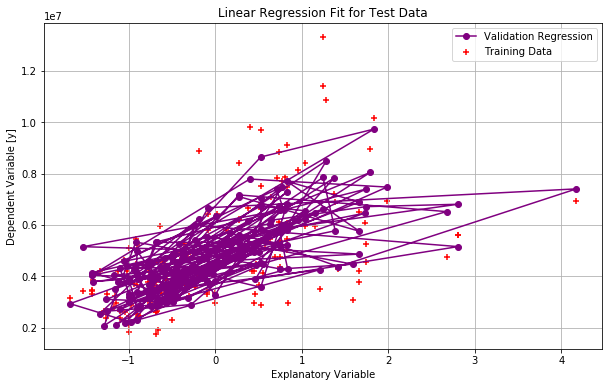

In [51]:
# plot test data 
plt.scatter(x_test_standard[:,1], y_test, color='red', marker= '+', label= 'Training Data')
#plt.plot(x_test[:,1], y_test, color='blue', marker= '+', label= 'Training Data')
plt.plot(x_test_standard[:,1],prediction, color='purple', marker= 'o', label='Validation Regression')
plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.xlabel('Explanatory Variable')
plt.ylabel('Dependent Variable [y]')
plt.title('Linear Regression Fit for Test Data')
plt.legend()